In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Continuous Distributions

Used for continuous variable or continuous data

#### "Less than" Probabilities
uniform.cdf(variable, lower_boundary, upper_boundary)

In [2]:
from scipy.stats import uniform

# P(x<=7)
uniform.cdf(7,0,12) # <-- 0 and 12 is the lower and upper boundary respectively

0.5833333333333334

#### "Greater than" Probabilities
1 - uniform.cdf(variable, lower_boundary, upper_boundary)

In [3]:
# P(x>=7)
1 - uniform.cdf(7,0,12) # Just subtract it to 1

0.41666666666666663

#### "Greater than to but less than to" Probabilities

In [4]:
# P(4<=x<=7)
uniform.cdf(7,0,12) - uniform.cdf(4,0,12)

0.25000000000000006

#### Generating Random Numbrs according to Uniform Distribution

uniform.rvs(minimum_val, maximum_val, size=number_of_random_numbers)

In [5]:
# Generate 10 random values between 0 and 5
uniform.rvs(0, 5, size=10)

array([4.83592225, 0.48348594, 3.26325192, 0.8858153 , 3.93539475,
       2.13875835, 2.60783525, 2.96790486, 0.60182058, 0.15791756])

#### Data Backups

Case Scenario:

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

In [6]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

In [7]:
# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,min_time, max_time)
prob_less_than_5

0.16666666666666666

In [8]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5,min_time, max_time)
prob_greater_than_5

0.8333333333333334

In [9]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - \
uniform.cdf(10, min_time, max_time)

prob_between_10_and_20

0.3333333333333333

#### Simulating Wait times

Case Scenario:

To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.



(array([ 97., 118., 111.,  91.,  83., 106., 106., 101.,  85., 102.]),
 array([ 0.06222649,  3.05509611,  6.04796574,  9.04083537, 12.03370499,
        15.02657462, 18.01944425, 21.01231387, 24.0051835 , 26.99805313,
        29.99092275]),
 <BarContainer object of 10 artists>)

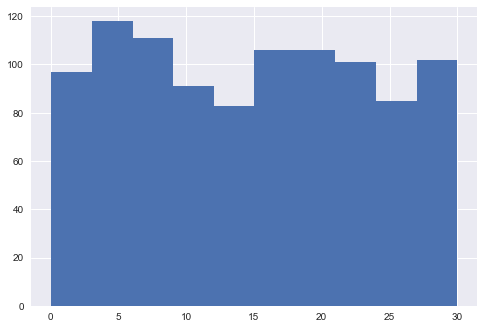

In [10]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(x=wait_times)


# Binomial Distributions

Probability distribution of the number of successes in a sequence of independent variables
- Used for paired data or data with two possible values
- Can be described by n and p, where:
	n = total number of trials,
	p = probability of success

E.g. Number of heads in a sequence of a coin flips

Note: This is also a discrete distribution since we are working with countable outcome

In [11]:
from scipy.stats import binom

Flipping a coin (1 = head, 0 = tail)

binom.rvs(# of coins, probability of heads/success, size=# of trials)

binom.rvs(number_of_data, probability_of_success, size=number_of_trials)


#### One flip many times

In [12]:
# Flipping 1 coin with 50% chance of success 8 times
binom.rvs(1, 0.5, size=8) 

array([1, 1, 0, 0, 1, 0, 0, 1])

#### Many flips one time

In [13]:
binom.rvs(8, 0.5, size=1)

array([4])

#### Many flips many time

In [14]:
# Flip 3 coints with 50% chance of success 10 times
binom.rvs(3, 0.5, size=10) 

array([1, 2, 2, 1, 1, 1, 1, 2, 1, 2])

#### Other Probabilities

H: 25% | T: 75%

In [15]:
binom.rvs(3, 0.25, size=10)

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 2])

1. What is the probability of 7 heads?

binom.pmf(num_heads, num_trials, prob_heads)

In [16]:
# P(heads=7)
binom.pmf(7,10,0.5)

0.11718749999999999

Interpretation: If we flip coin 10 coins, there's about 11.72% that 7 of them will be heads

2. What's the probability of 7 or fewer heads?

In [17]:
# P(heads>=7)
1 - binom.cdf(7,10,0.5)

0.0546875

**Expected value of Binomial Distribution** is n x p

Expected number of heads out of 10 flips = 10 x 0.5 = 5

**Independence** 
- The binomial distribution is a probability distribution of the number of successes in a sequence of **independent** trials.

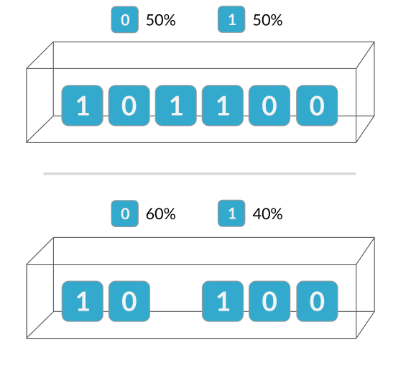

Probabilities of second trial are altered due to outcome of the first.

***If trials are not independent, the binomial distribution does not apply!***

#### Simulating Sales Deals

Case Scenario:

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [18]:
from scipy.stats import binom
np.random.seed(10)

In [19]:
# Simulate a single deal
binom.rvs(1, .30, size=1)

array([1])

In [20]:
# Simulate 1 week of 3 deals
binom.rvs(3, .30, size=1)

array([0])

In [21]:
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, .30, size=52)

In [22]:
# Mean of deals won per week
np.mean(deals)

0.8461538461538461

#### Calculating Binomial Probabilities

Case Scenario:

Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

In [23]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf (3,3, .30)
prob_3

0.026999999999999996

In [24]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,.30)
prob_less_than_or_equal_1

0.784

In [25]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1,3,.30)
prob_greater_than_1

0.21599999999999997

#### How many sales will be won?

Case Scenario:

Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations

- Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
- Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.
- Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [26]:
# Expected number won with 30% win rate
won_30pct = 3 * .30


# Expected number won with 25% win rate
won_25pct = 3 * .25


# Expected number won with 35% win rate
won_35pct = 3 * .35

print(won_30pct, won_25pct, won_35pct)

0.8999999999999999 0.75 1.0499999999999998


# Normal Distribution
- Its shapes is bell curved
- Symmetrical
- Area = 1
- Curve never hits 0
- Described by mean and standard deviation

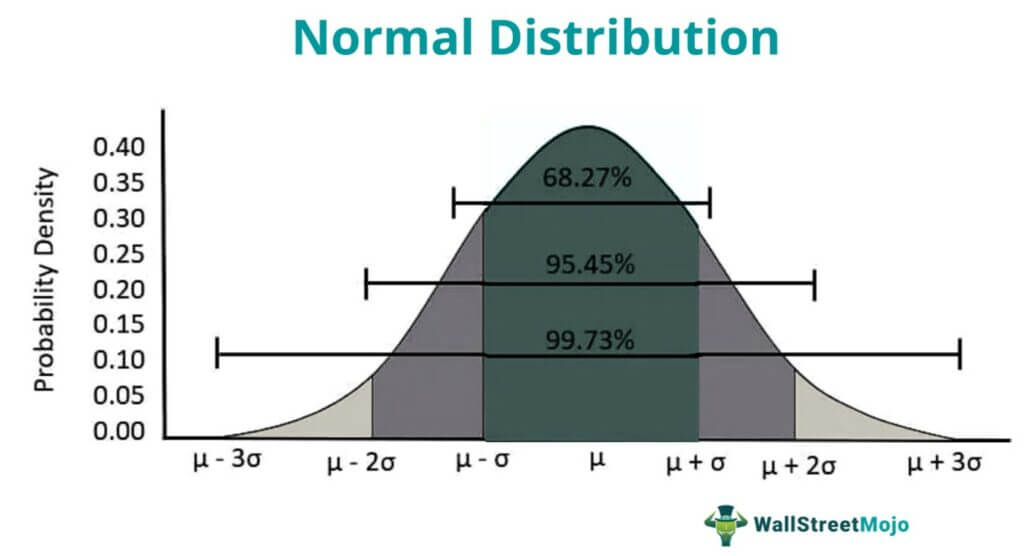 

### Standard Normal Distribution
- When mean = 0, and standard = 1

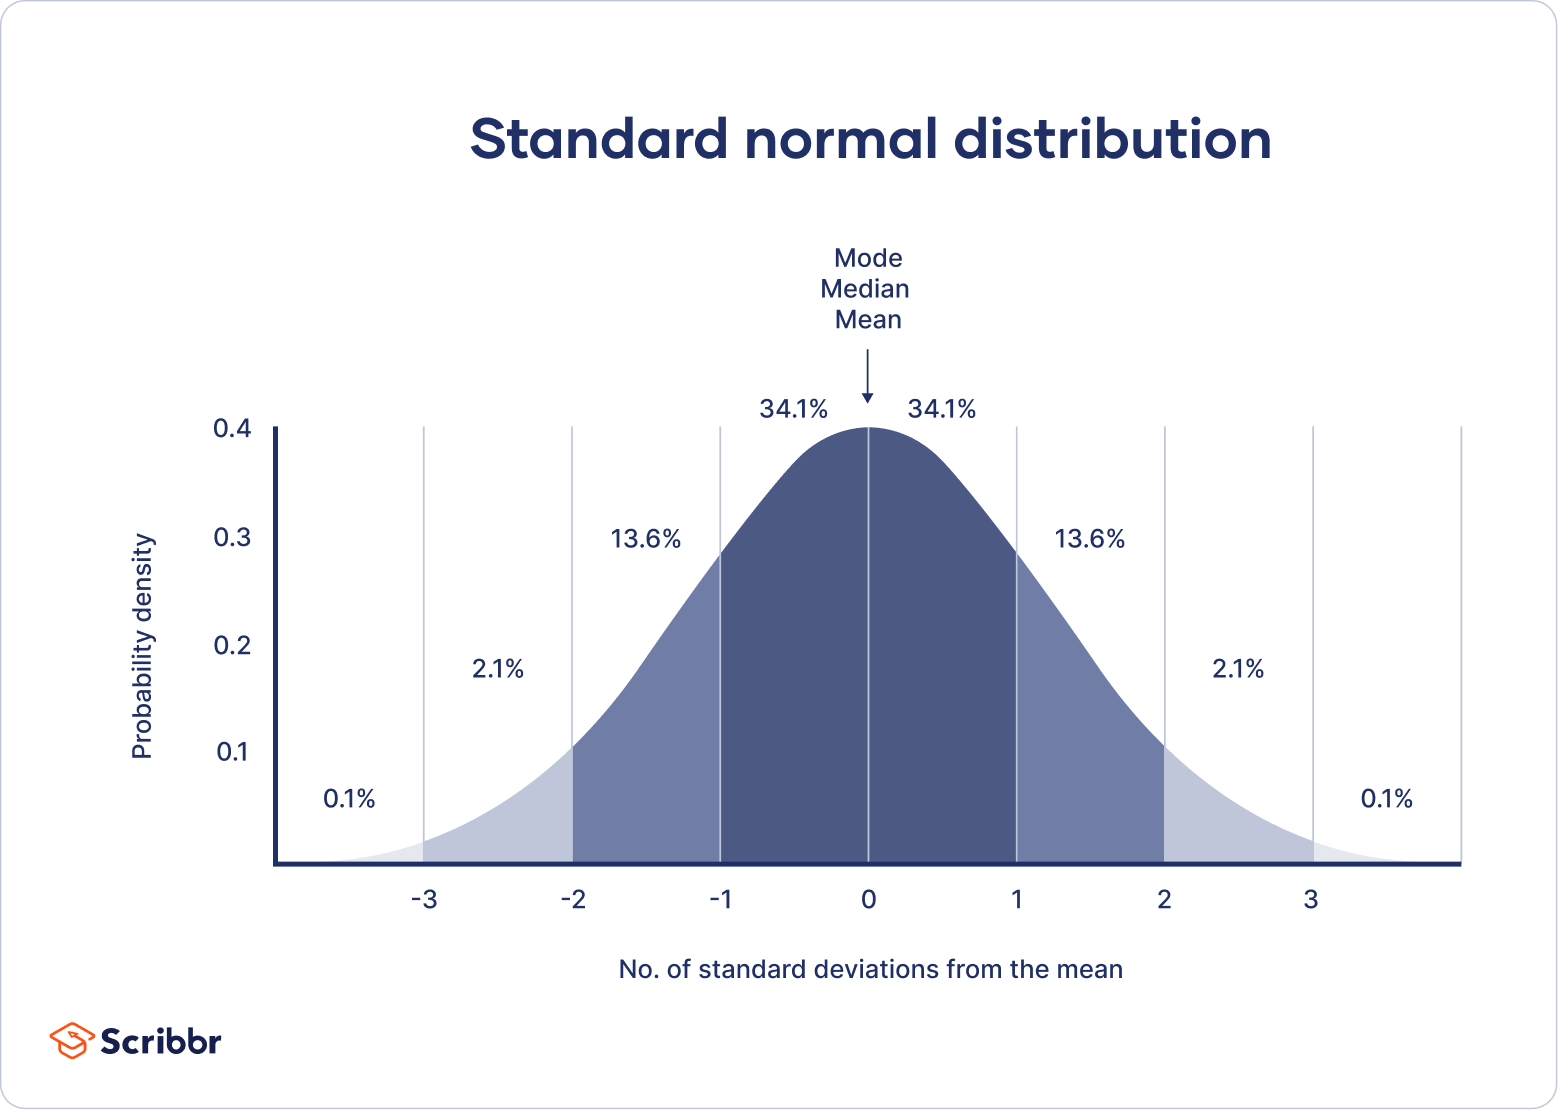

In [27]:
from scipy.stats import norm

#### "Shorter than" Probabilities

1. What percent of women are shorter than 154 cm?

norm.cdf(number_of_interest, mean, standard_deviation) 

In [28]:
norm.cdf(154, 161, 7)

0.15865525393145707

#### "Greater than" Probabilities

2. What percent of women are taller than 154 cm?

1 - norm.cdf(number_of_interest, mean, standard_deviation) 

In [29]:
1 - norm.cdf(154, 161, 7)

0.8413447460685429

#### "Greater than to but less than to" Probabilities

3. What percent of women are 154-157 cm?

In [30]:
norm.cdf(157, 161, 7) - norm.cdf(154, 161, 7)

0.1251993291672192

#### Percentiles
4. What height are 90% women shorter than? 

norm.ppf(percentage_of_interest,mean, standard_deviation)

In [31]:
norm.ppf(0.9, 161, 7)

169.9708609588122

5. What height are 90% women taller than? (percentiles)

norm.ppf( (1 - percentage_of_interest), mean, standard_deviation)

In [32]:
norm.ppf((1-0.9), 161, 7)

152.0291390411878

#### Generating Random Numbers

In [33]:
# Generate 10 random heights
norm.rvs(161, 7, size=10)

array([164.95606869, 159.9680582 , 160.81866264, 163.02365943,
       157.2208465 , 165.95712014, 166.89557317, 162.42506558,
       177.76292565, 167.42221256])

In [34]:
amir_deals_amount = list(norm.rvs(5000, 2000, size=180))

#### Distribution of Amir's sales

Case Scenario:

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.


<AxesSubplot:>

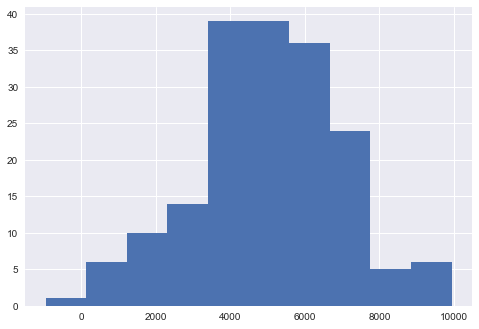

In [35]:
amir_deals = pd.DataFrame({'amount':amir_deals_amount})
amir_deals['amount'].hist(bins=10)

In [36]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000,2000)
prob_less_7500

0.8943502263331446

In [37]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000,2000)
prob_over_1000

0.9772498680518208

In [38]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) -  norm.cdf(3000, 5000, 2000)
prob_3000_to_7000 

0.6826894921370859

In [39]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)
pct_25

3651.0204996078364

Nifty normal distribution usage! You know that you can count on Amir 75% (1-0.25) of the time to make a sale worth at least $3651.02. This information could be useful in making company-wide sales projections.

#### Simulating sales under new market conditions

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, you'll simulate new sales amounts using the normal distribution and store these in the new_sales DataFrame, which has already been created for you.

- Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% and store this in new_mean.

- Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd.

- Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd.

(array([2., 2., 5., 5., 4., 6., 6., 2., 2., 2.]),
 array([  753.93150305,  1773.13740357,  2792.34330409,  3811.54920461,
         4830.75510513,  5849.96100564,  6869.16690616,  7888.37280668,
         8907.5787072 ,  9926.78460772, 10945.99050824]),
 <BarContainer object of 10 artists>)

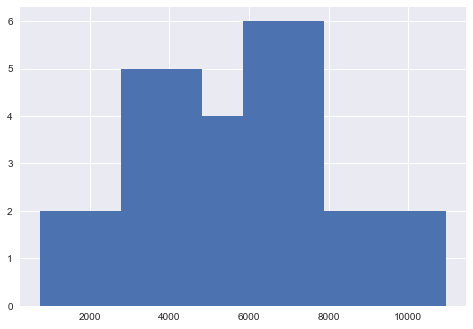

In [40]:
# Calculate new average amount
new_mean = 5000 + (5000*0.20)

# Calculate new standard deviation
new_sd = 2000 + (2000*0.30)

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(x=new_sales, bins=10)

In [41]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) -  norm.cdf(3000, 5000, 2000)
prob_3000_to_7000 

0.6826894921370859

In [42]:
# Probability of deal between 3000 and 7000 in the new sales data
prob_3000_to_7000 = norm.cdf(7000, new_mean, new_sd) -  norm.cdf(3000, new_mean, new_sd)
prob_3000_to_7000 

0.5254571788394846

# Central Limit Theorem
The sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increases.
- Estimate Characteristics of Unknown Underlying Distribution
- More easily estimate characteristics of large populations
- Regardless of the shape of the distribution you're taking sample means from, the central limit theorem will apply if the sampling distribution contains enough sample means.

#### Rolling the dice 5 times

In [43]:
die = pd.Series([1,2,3,4,5,6])
# Roll 5 times
samp_5 = die.sample(5, replace=True)
samp_5

1    2
5    6
0    1
5    6
1    2
dtype: int64

In [44]:
np.mean(samp_5)

3.4

#### Rolling the dice 5 times 10 times
Repeat 10 times:
- Roll 5 times
- Take the mean

In [45]:
sample_means = []
for i in range(10):
    samp_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(samp_5))
    
sample_means

[4.0, 2.8, 2.0, 3.0, 3.6, 4.2, 2.0, 4.2, 5.0, 4.0]

In [46]:
# List comprehension
sample_means = [np.mean(die.sample(5, replace=True)) for i in range(10)]
sample_means

[2.2, 3.8, 2.6, 3.6, 3.0, 2.0, 4.2, 2.4, 4.6, 2.6]

### Sampling Distribution
The following will prove that the sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increases.

(array([2., 1., 0., 0., 0., 0., 2., 2., 0., 3.]),
 array([1.8 , 2.02, 2.24, 2.46, 2.68, 2.9 , 3.12, 3.34, 3.56, 3.78, 4.  ]),
 <BarContainer object of 10 artists>)

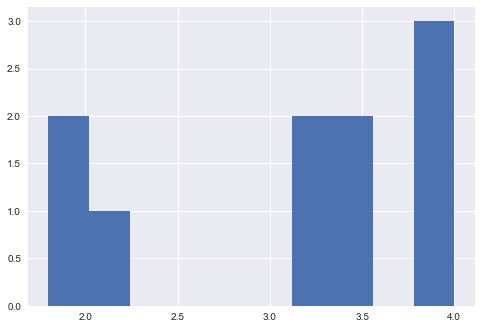

In [47]:
sample_means = [np.mean(die.sample(5, replace=True)) for i in range(10)]
plt.hist(x=sample_means)

(array([ 1.,  3.,  7., 16., 22., 20., 16.,  9.,  5.,  1.]),
 array([1.6 , 1.98, 2.36, 2.74, 3.12, 3.5 , 3.88, 4.26, 4.64, 5.02, 5.4 ]),
 <BarContainer object of 10 artists>)

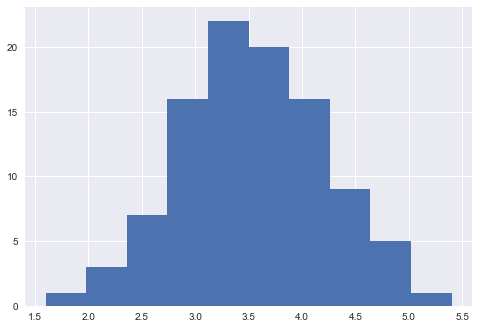

In [48]:
sample_means = [np.mean(die.sample(5, replace=True)) for i in range(100)]
plt.hist(x=sample_means)

(array([ 14.,  41., 114., 248., 180., 195., 147.,  43.,  15.,   3.]),
 array([1.4 , 1.86, 2.32, 2.78, 3.24, 3.7 , 4.16, 4.62, 5.08, 5.54, 6.  ]),
 <BarContainer object of 10 artists>)

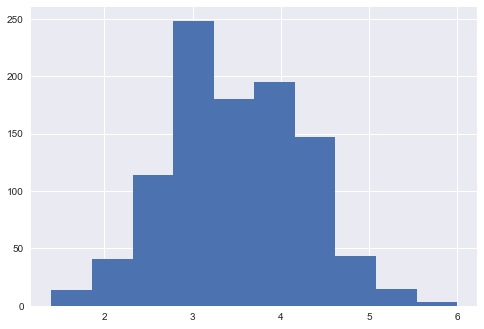

In [49]:
sample_means = [np.mean(die.sample(5, replace=True)) for i in range(1000)]
plt.hist(x=sample_means)

#### Standard Deviation and the CLT

In [50]:
sample_sds = []
for i in range(1000):
    sample_sds.append(np.std(die.sample(5, replace=True)))

(array([  2.,   9.,  16.,  67., 194., 163., 253., 213.,  62.,  21.]),
 array([0.        , 0.24494897, 0.48989795, 0.73484692, 0.9797959 ,
        1.22474487, 1.46969385, 1.71464282, 1.95959179, 2.20454077,
        2.44948974]),
 <BarContainer object of 10 artists>)

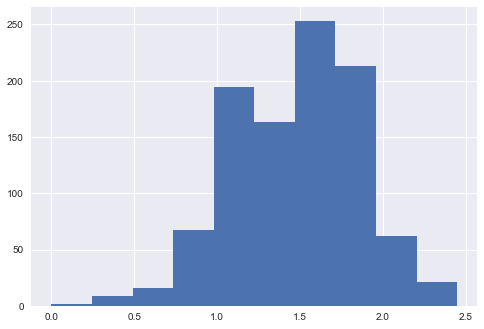

In [51]:
plt.hist(x=sample_sds)

#### Proportions and the CLT

(array([7., 0., 0., 0., 0., 1., 0., 0., 0., 2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

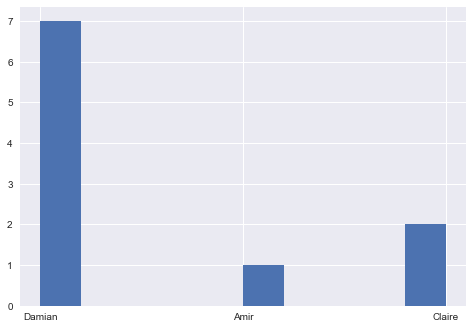

In [57]:
sales_team = pd.Series(['Amir', 'Brian', 'Claire', 'Damian'])

plt.hist(x=sales_team.sample(10, replace=True))

(array([253.,   0.,   0., 287.,   0.,   0., 226.,   0.,   0., 234.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

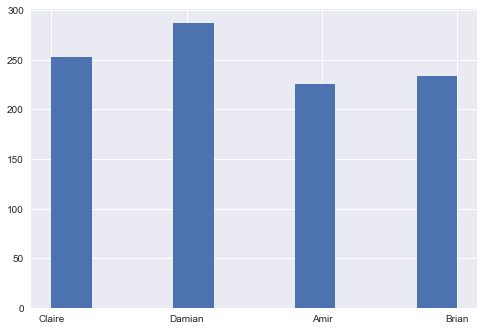

In [60]:
plt.hist(x=sales_team.sample(1000, replace=True))

In [61]:
np.mean(sample_means)

3.4802

# Poisson Distribution
***Red as Poson***

- Events appear to happen at a certain rate, but completely at random 
- Probability of some number of events occuring over a fixed period of time

#### Examples  of Poisson Processes

- Number of animals adopted from an animal shelter per week
- Number of people arriving at a restaurant per hour
- Number of earthquakes in California per year

Time unit is irrelevant, as long as you use the same unit when talking about the same situation

#### Use cases:
- Finding the probability of >= 5 animals adopted from an animal shelter per week.
- Finding the probability of 12 people arriving at a restaurant per hour.
- Finding the probability < 20 earthquakes in a California per year

Described by Lambda
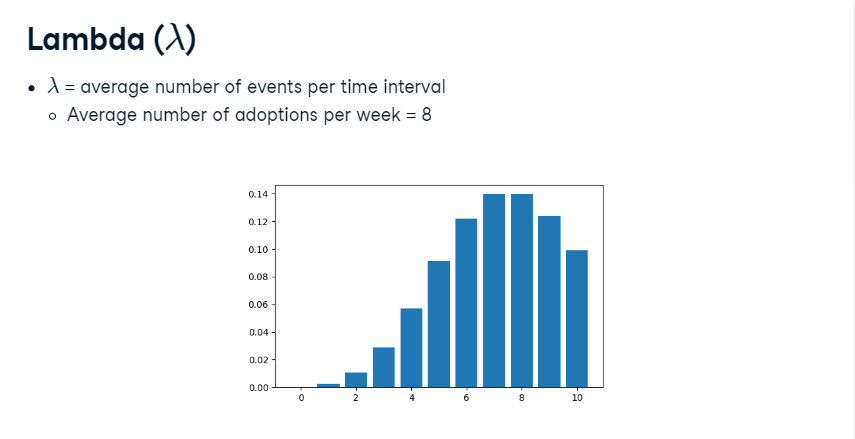
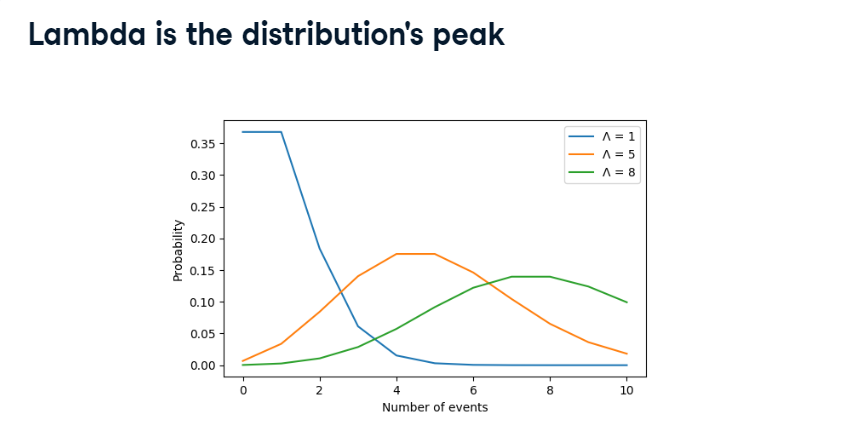

In [65]:
from scipy.stats import poisson

### Probability of a single value

#### "Equal" Probabilities

If the average number of adoptions per week is 8, what is P(#adoptions in a week **=** 5)

In [66]:
poisson.pmf(5, 8)

0.09160366159257921

#### "Less than" Probabilities

If the average number of adoptions per week is 8, what is P(#adoptions in a week **<=** 5)

In [69]:
poisson.cdf(5, 8)

0.19123606207962532

#### "Greater than" Probabilities

If the average number of adoptions per week is 8, what is P(#adoptions in a week > 5)

In [67]:
1 - poisson.cdf(5, 8)

0.8087639379203747

If the average number of adoptions per week is 10, what is P(#adoptions in a week > 5)

In [68]:
1 - poisson.cdf(5, 10)

0.9329140371209681

#### Sampling from a Poisson Distribution

In [70]:
# Generate random numbers
poisson.rvs(8, size=10)

array([10,  6,  8,  4,  3,  8, 10,  6,  9,  8])

# Exponential Distribution
- Probability of time between Poisson events
- Also uses Lambda (rate)
- Continuous (time)

Examples:
- Probability of > 1 day between adoptions
- Probability of < 10 minutes between restaurant arrivals
- Probability of 6-8 months between earthquakkes

Use Cases:
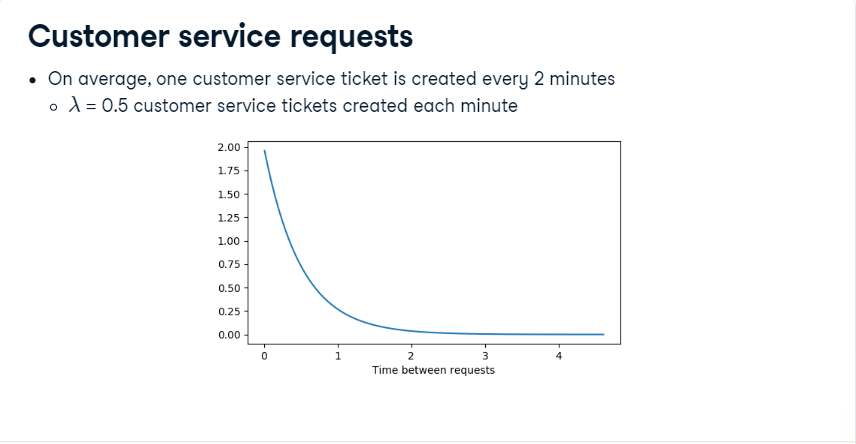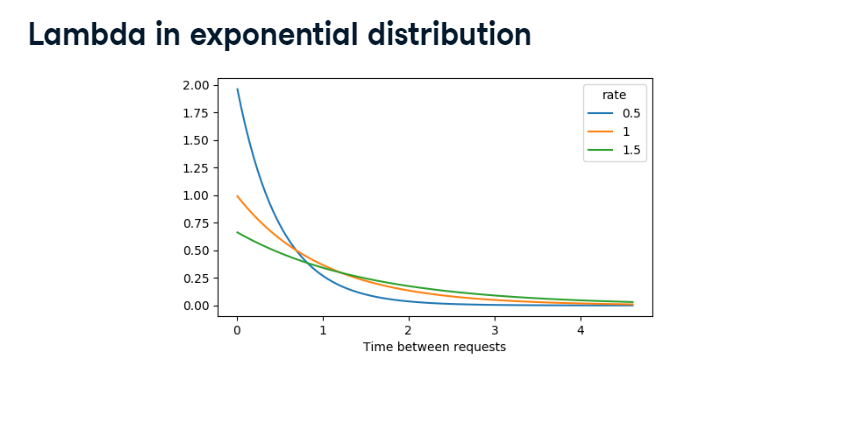

In [71]:
from scipy.stats import expon

In [72]:
# P(variable < 4)
expon.cdf(1, scale=2)

0.3934693402873666

In [73]:
# P(variable > 4)
1 - expon.cdf(1, scale=2)

0.6065306597126334

In [74]:
# P(1 < var < 4)
expon.cdf(4, scale=2) - expon.cdf(1, scale=2)

0.4711953764760207

# t-distribution
Has a parameter called the degrees of freedom (df)
- Lower df = thicker tails, higher standard deviation
- Higher df = closer to normal distribution

# Log-normal distribution
Variable whose logarithm is normally distributed

Examples:
- Length of chess games
- Adult blood pressure
- Number of hospitalizations in the 2003 SARS outbreak
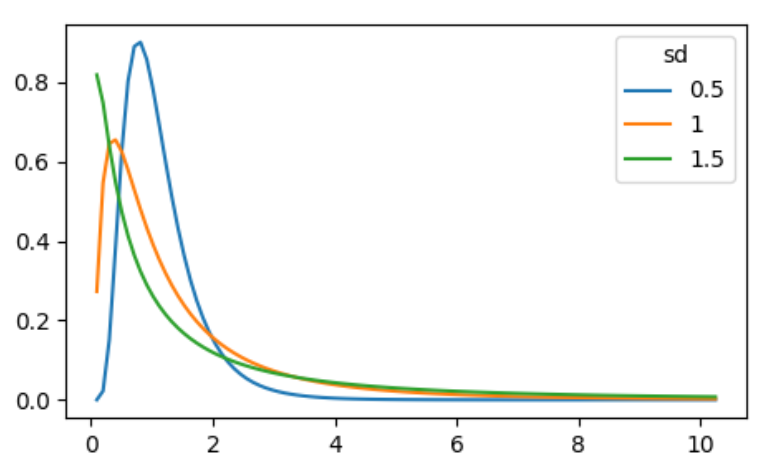

# Poisson vs Exponential vs Binomial
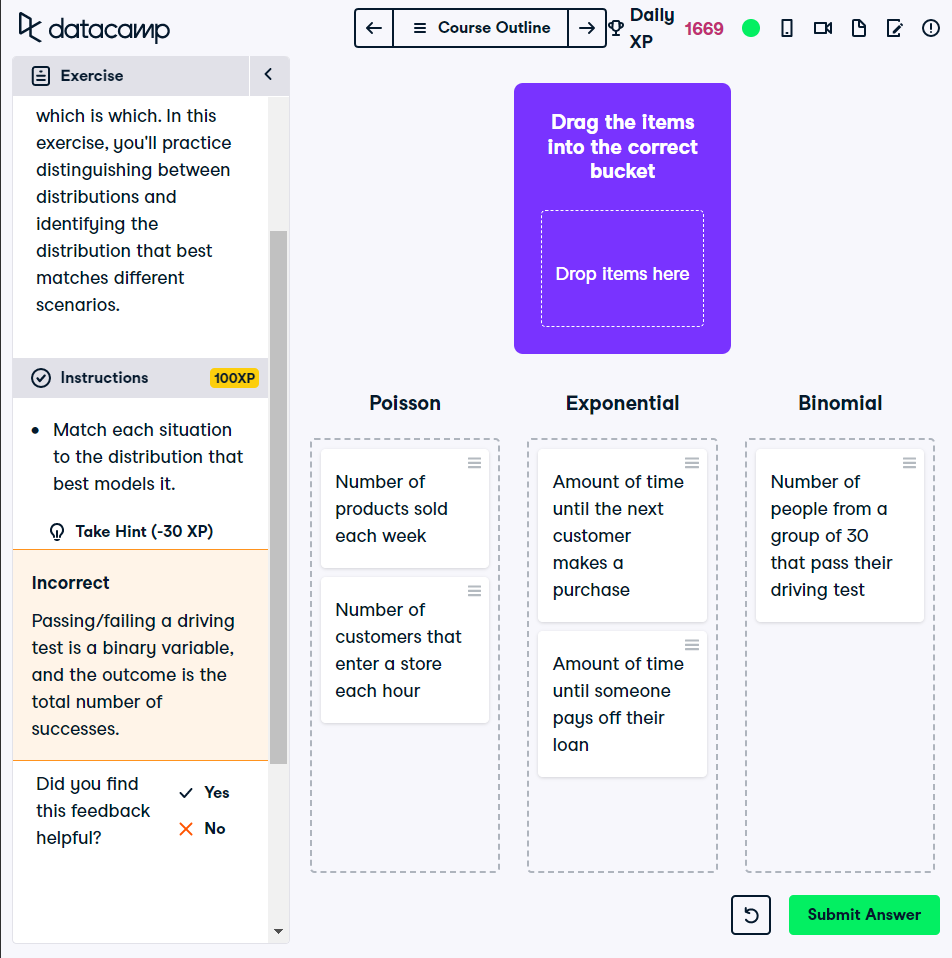

#### Modeling time between leads

In [76]:
from scipy.stats import expon

In [81]:
# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

0.3296799539643607


In [79]:
# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

0.20189651799465536


In [78]:
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.09929769391754684


# Correlation

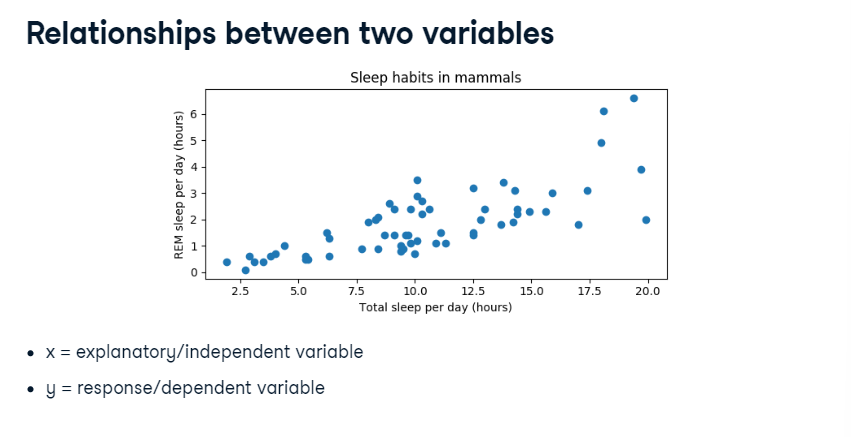

#### Correlation Coefficient
- Quantifies the linear relationship between two variables
- Number between -1 and 1
- Magnitude corresponds to strength of relationship
- Sign (+ or -) corresponds to direction of relationship

Example:
- 0.75 (positive correlation coefficient): As x increases, y also increases
- -0.75 (positive correlation coefficient): As x increases, y deccreases

### Visualizing Relationships

**Scatter Plot**

import seaborn as sns

sns.scatterplot(x=column_name_indep_var, y=column_name_dep_vat, data=dataframe)

**Adding a trendline**

sns.lmplot(x=column_name_indep_var, y=column_name_dep_vat, data=dataframe, ci=None)

**Computing Correlation**

df [ 'column_name_indep_vat' ].corr(df [ 'column_name_dept_vat' ])

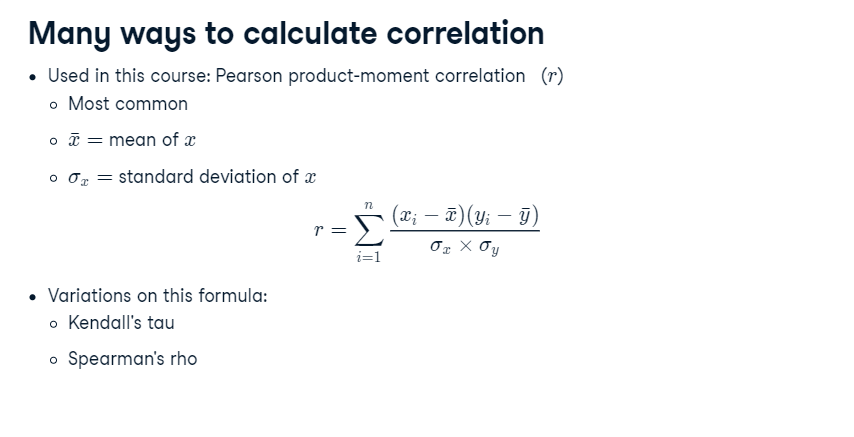


***Note: When correlation is 0, that means there is no relationship between two variables and the points appear to be randomly scattered.***

### Correlation Caveats

**1. Correlation only accounts for linear relationships**
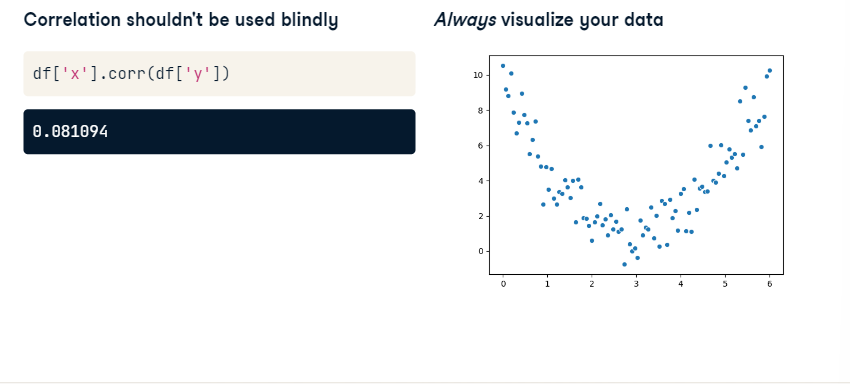

***The correlation coefficient can't account for any relationships that aren't linear, regardless of strength.***

When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable so that correlation can be computed.

**Tip: When data is highly skewed, we can apply log transformation**

- Create  a new column for the log transformed data

df [ 'log_indep_var_column_name' ] = np.log(df [ 'indep_var_column_name' ]) 

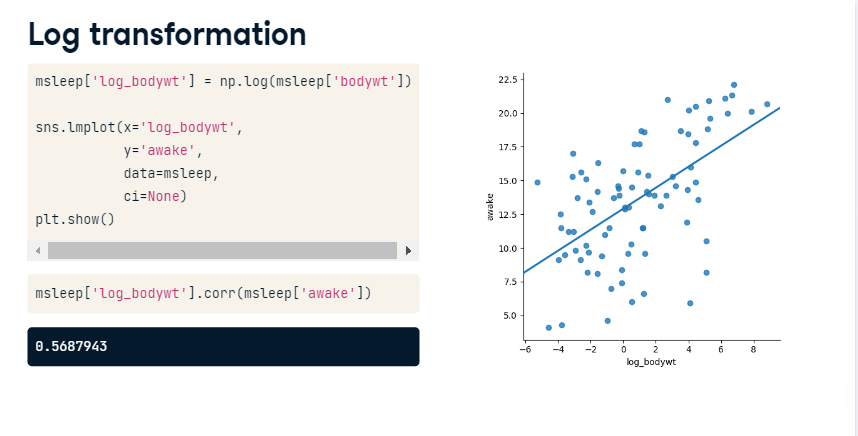

**Other Transformation**
- Log transformation | **log(x)**
- Square root transformation | **sqrt(x)**
- Reciprocal Transformation | **1/x**
- Combinations of these, e.g.: | **log(x) and log(y) ; sqrt(x) and 1/y**

**2. Correlation does not imply causation**
- if x is correlated with y, it does not mean that x causes y

For example:
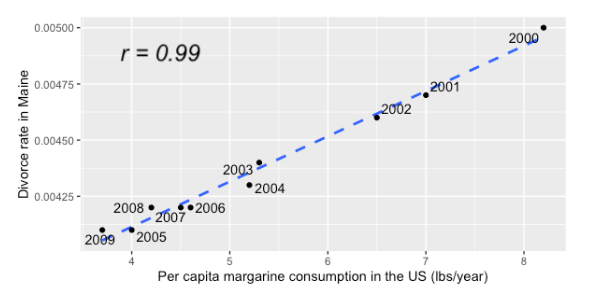
There is a strong correlation relationship between the per capita margarine consumption in the US and the divorce rate. However, it does not mean that consuming margarine is the cause why divorce is increases. This is an example of **spurious correlations**.

Example of interpretation for correlation analysis:

**BAD:** Increased sugar consumption leads to a higher happiness score.

**GOOD:** Increased sugar consumption is associated with a higher happiness score.

**Confounding leads to spurious correlations**
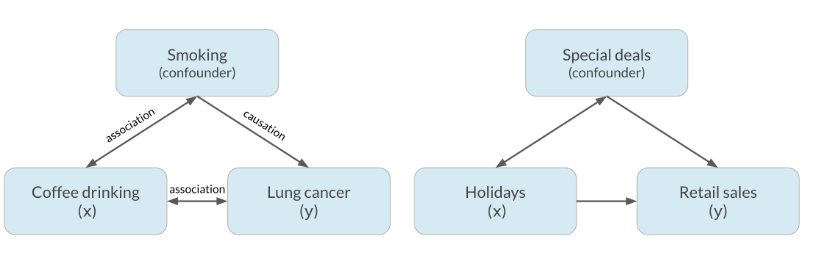



# Design of Experiments

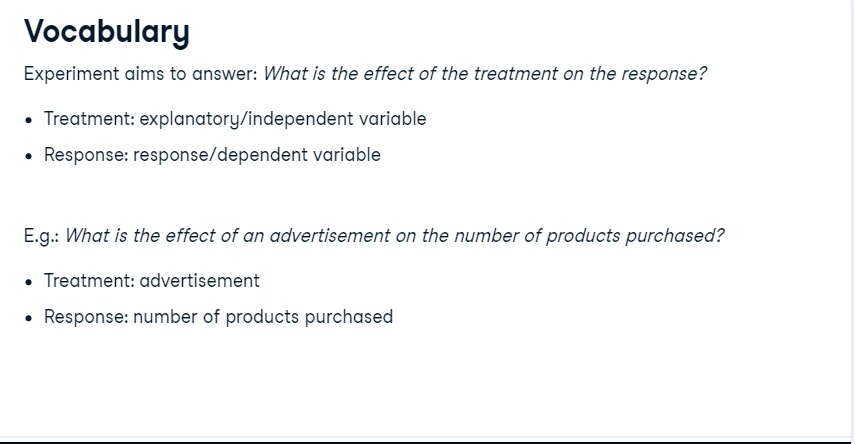


## Controlled Experiments
- Participants are assigned by researchers to either treatment group or control group
- Groups should be comparable so that causation can be inferred
- If groups are not comparable, this could lead to confounding (bias)

**Types of Controlled Experiments**

1. Randomized controlled trial
- Participants are assigned to treatment/control randomly, not based on any other characteristics
- Choosing randomly helps ensure that groups are comparable
2. Placebo
- Resembles treatment, but has no effect
- Participants will not know which group they're in
- In clinical trials, a sugar pill ensures that the effect of the drug is actually due to the drug itself and not the idea of receiving the drug
3. Double-blind trial
- Person administering the treatment/running the study doesn't know whether the
treatment is real or a placebo
- Prevents bias in the response and/or analysis of results

***Fewer opportunities for bias = more reliable conclusion about causation***

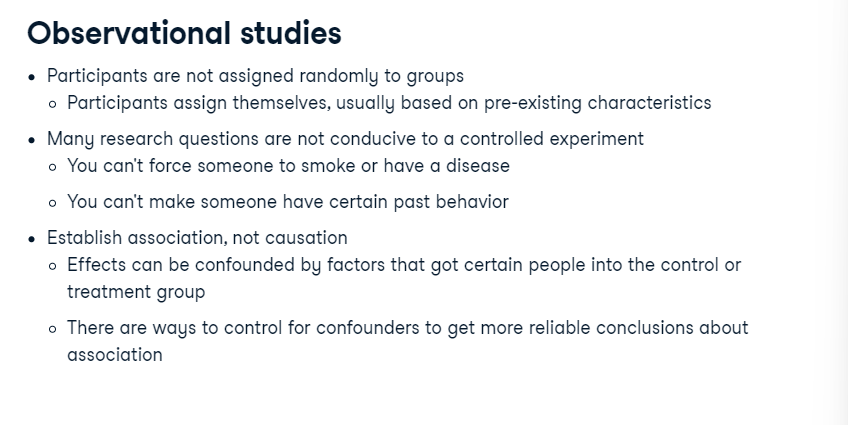
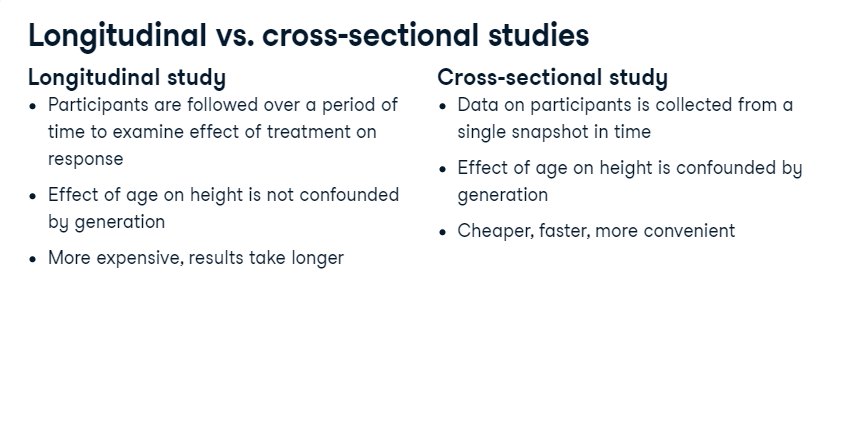

*While controlled experiments are ideal, many situations and research questions are not conducive to a controlled experiment. In a controlled experiment, causation can likely be inferred if the control and test groups have similar characteristics and don't have any systematic difference between them. On the other hand, causation cannot usually be inferred from observational studies, whose results are often misinterpreted as a result.*

**observational study claims to esablish a causal relationship**